In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

chatterbox = pd.read_csv("employees.csv")

In [11]:
# # Identify the data type of each variable
# Check the data types of each variable
data_types = chatterbox.dtypes
print(data_types)

Employee_No             int64
Employee_Code           int64
Name                   object
Title                  object
Gender                 object
Religion_ID             int64
Marital_Status         object
Designation_ID          int64
Date_Joined            object
Date_Resigned          object
Status                 object
Inactive_Date          object
Reporting_emp_1        object
Reporting_emp_2        object
Employment_Category    object
Employment_Type        object
Religion               object
Designation            object
Year_of_Birth          object
dtype: object


In [12]:
# # Imputing missing values
# Count the number of missing values in each column
missing_values = chatterbox.isnull().sum()

print(missing_values)

Employee_No             0
Employee_Code           0
Name                    0
Title                   0
Gender                  0
Religion_ID             0
Marital_Status         67
Designation_ID          0
Date_Joined             0
Date_Resigned           0
Status                  0
Inactive_Date           0
Reporting_emp_1         0
Reporting_emp_2         0
Employment_Category     0
Employment_Type         0
Religion                0
Designation             0
Year_of_Birth           0
dtype: int64


In [13]:
count_distinct_years_of_birth = chatterbox['Year_of_Birth'].unique()

year_count = chatterbox['Year_of_Birth'].value_counts()
# print(year_count)

In [14]:
# # Imputation
# Split the data into two sets: one with missing values and the other with non-missing values
missing_data = chatterbox[chatterbox['Marital_Status'].isnull()]
non_missing_data = chatterbox[chatterbox['Marital_Status'].notnull()]

In [15]:
# Prepare the features and target for training
features = non_missing_data[[
    'Gender', 'Religion', 'Designation', 'Year_of_Birth']]
target = non_missing_data['Marital_Status']

In [16]:
# Encode the categorical columns using one-hot encoding with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(
    features[['Gender', 'Religion', 'Designation']])


In [17]:
# Train a Decision Tree classifier model
model = DecisionTreeClassifier()
model.fit(encoded_features.toarray(), target)

DecisionTreeClassifier()

In [18]:
# Encode the missing values for prediction
missing_features = missing_data[['Gender', 'Religion', 'Designation']]
encoded_missing_features = encoder.transform(
    missing_features[['Gender', 'Religion', 'Designation']])

In [19]:
# Predict the missing values using the trained model
predicted_values = model.predict(encoded_missing_features.toarray())

In [20]:
# Fill in the missing values in the 'Marital_Status' column with the predicted values
chatterbox.loc[chatterbox['Marital_Status'].isnull(), 'Marital_Status'] = predicted_values

In [21]:
# Convert 'Marital_Status' column back to string type
chatterbox['Marital_Status'] = chatterbox['Marital_Status'].astype(str)

In [22]:
duplicate_rows = chatterbox.duplicated()
print(duplicate_rows.sum())

0


In [23]:
chatterbox['Year_of_Birth'] = chatterbox['Year_of_Birth'].replace("'0000'", 'N/A')

In [24]:
year_count = chatterbox['Year_of_Birth'].value_counts()
# print(year_count)

In [25]:
# # Finding the mean year of birth for married employee
# Convert "Year_of_Birth" to numeric, ignoring any non-numeric values
chatterbox['Year_of_Birth'] = pd.to_numeric(chatterbox['Year_of_Birth'], errors='coerce')

In [26]:
# Filter rows where "Year_of_Birth" is numeric and "Marital_Status" is 'Married'
filtered_data = chatterbox.loc[(~np.isnan(chatterbox['Year_of_Birth'])) & (chatterbox['Marital_Status'] == 'Married')]

In [27]:
# Calculate the mean of "Year_of_Birth" for the filtered data
married_mean_year_of_birth = round(filtered_data['Year_of_Birth'].mean())
# print(married_mean_year_of_birth)

In [28]:
# Fill missing values in the "Year_of_Birth" column for married employees with the rounded mean value
chatterbox.loc[(chatterbox['Marital_Status'] == 'Married') & (chatterbox['Year_of_Birth'].isna()), 'Year_of_Birth'] = married_mean_year_of_birth
# print(chatterbox['Year_of_Birth'])

In [29]:
year_count = chatterbox['Year_of_Birth'].value_counts()
# print(year_count)

In [30]:
# # Finding the mean year of birth for married employee
# Calculate the mean of "Year_of_Birth" for single employees and round to the nearest whole number
single_mean_year_of_birth = round(
    chatterbox.loc[chatterbox['Marital_Status'] == 'Single', 'Year_of_Birth'].mean())

# print(single_mean_year_of_birth)

In [31]:
# Fill missing values in the "Year_of_Birth" column for single employees with the rounded mean value
chatterbox.loc[(chatterbox['Marital_Status'] == 'Single') & (chatterbox['Year_of_Birth'].isna()), 'Year_of_Birth'] = single_mean_year_of_birth

In [32]:
# print(chatterbox['Year_of_Birth'])

year_count = chatterbox['Year_of_Birth'].value_counts()

In [33]:
count_distinct_resign_years = chatterbox['Date_Resigned'].nunique()
print(count_distinct_resign_years)

256


In [34]:
year_count = chatterbox['Date_Resigned'].value_counts()
print(year_count)

\N            273
0000-00-00    183
10/31/2021     21
12/31/2021     17
4/2/2022       13
             ... 
6/9/2022        1
8/5/2022        1
3/4/2022        1
12/26/2020      1
12/22/2022      1
Name: Date_Resigned, Length: 256, dtype: int64


In [35]:
chatterbox.loc[(chatterbox['Status'] == 'Active') & (chatterbox['Inactive_Date'] == '0000-00-00'), 'Inactive_Date'] = '\\N'
chatterbox.loc[(chatterbox['Status'] == 'Active') & (chatterbox['Date_Resigned'] == '0000-00-00'), 'Date_Resigned'] = '\\N'

In [36]:
chatterbox.loc[(chatterbox['Status'] == 'Inactive') & (chatterbox['Date_Resigned'] != '\\N') & 
               (chatterbox['Date_Resigned'] != '0000-00-00'), 'Inactive_Date'] = chatterbox['Date_Resigned']
chatterbox.loc[(chatterbox['Status'] == 'Inactive') & (chatterbox['Inactive_Date'] != '\\N') & 
               (chatterbox['Inactive_Date'] != '0000-00-00'), 'Date_Resigned'] = chatterbox['Inactive_Date']

In [37]:
chatterbox['Date_Resigned'] = chatterbox['Date_Resigned'].replace('0000-00-00', '\\N')
chatterbox['Inactive_Date'] = chatterbox['Inactive_Date'].replace('0000-00-00', '\\N')

In [38]:
year_count = chatterbox['Date_Resigned'].value_counts()
print(year_count)

\N            233
12/31/2020     23
10/31/2021     21
12/31/2021     17
4/30/2022      13
             ... 
10/28/2020      1
2/13/2021       1
3/16/2020       1
6/21/2021       1
12/22/2022      1
Name: Date_Resigned, Length: 351, dtype: int64


In [148]:
# count_distinct_resign_years = chatterbox['Date_Resigned'].nunique()
# print(count_distinct_resign_years)

# year_count = chatterbox['Date_Resigned'].value_counts()
# print(year_count)

# Inaccurate_resigns = chatterbox.loc[chatterbox['Status'] == 'Active', 'Inactive_Date']
# print(Inaccurate_resigns.unique())


# # Convert categorical columns to appropriate data types
# chatterbox['Gender'] = chatterbox['Gender'].astype('category')
# chatterbox['Marital_Status'] = chatterbox['Marital_Status'].astype('category')

# # Handle outliers in numerical columns using the IQR method
# def handle_outliers_iqr(data, column, lower_multiplier=1.5, upper_multiplier=1.5):
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_limit = Q1 - (lower_multiplier * IQR)
#     upper_limit = Q3 + (upper_multiplier * IQR)
#     data[column] = np.where((data[column] < lower_limit) | (data[column] > upper_limit), np.nan, data[column])

In [149]:
chatterbox.to_csv('employee_preprocess_200583P.csv', index=False)

In [150]:
df = pd.read_csv("employee_preprocess_200583P.csv", parse_dates=['Date_Joined'])

In [151]:
print(df.dtypes)

Employee_No                     int64
Employee_Code                   int64
Name                           object
Title                          object
Gender                         object
Religion_ID                     int64
Marital_Status                 object
Designation_ID                  int64
Date_Joined            datetime64[ns]
Date_Resigned                  object
Status                         object
Inactive_Date                  object
Reporting_emp_1                object
Reporting_emp_2                object
Employment_Category            object
Employment_Type                object
Religion                       object
Designation                    object
Year_of_Birth                 float64
dtype: object


<Figure size 800x600 with 0 Axes>

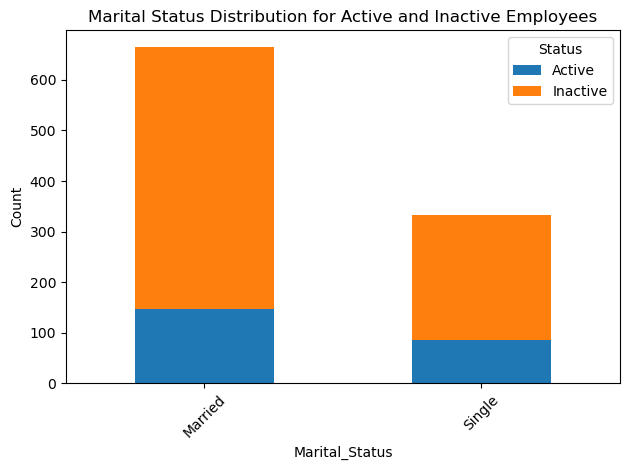

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed dataset
chatterbox = pd.read_csv("employee_preprocess_200583P.csv")

# Exclude the 'Date_Joined' field from the dataset
chatterbox_no_date_joined = chatterbox.drop(columns=['Date_Joined','Date_Resigned','Inactive_Date'])

# Define a function to plot bar plots with active/inactive distinction
def plot_active_inactive_bar(field, title):
    plt.figure(figsize=(8, 6))
    ax = chatterbox_no_date_joined.groupby([field, 'Status'])['Employee_No'].count().unstack().plot(kind='bar', stacked=True)
    ax.set_xlabel(field)
    ax.set_ylabel('Count')
    ax.set_title(title)
    plt.legend(title='Status', loc='upper right', labels=['Active', 'Inactive'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Bar Plot for Marital Status
plot_active_inactive_bar('Marital_Status', 'Marital Status Distribution for Active and Inactive Employees')




In [174]:
# Calculate the total number of employees for each marital status category
total_employees_by_status = chatterbox_no_date_joined.groupby('Marital_Status')['Employee_No'].count()
print(total_employees_by_status)
# Calculate the number of active employees for each marital status category
active_employees_by_status = chatterbox_no_date_joined[chatterbox_no_date_joined['Status'] == 'Active'].groupby('Marital_Status')['Employee_No'].count()
print(active_employees_by_status)
# Calculate the retention rate for each marital status category
retention_rate_by_status = (active_employees_by_status / total_employees_by_status) * 100

# Print the retention rates
print("Retention Rate by Marital Status:")
print(retention_rate_by_status)


Marital_Status
Married    665
Single     332
Name: Employee_No, dtype: int64
Marital_Status
Married    147
Single      86
Name: Employee_No, dtype: int64
Retention Rate by Marital Status:
Marital_Status
Married    22.105263
Single     25.903614
Name: Employee_No, dtype: float64


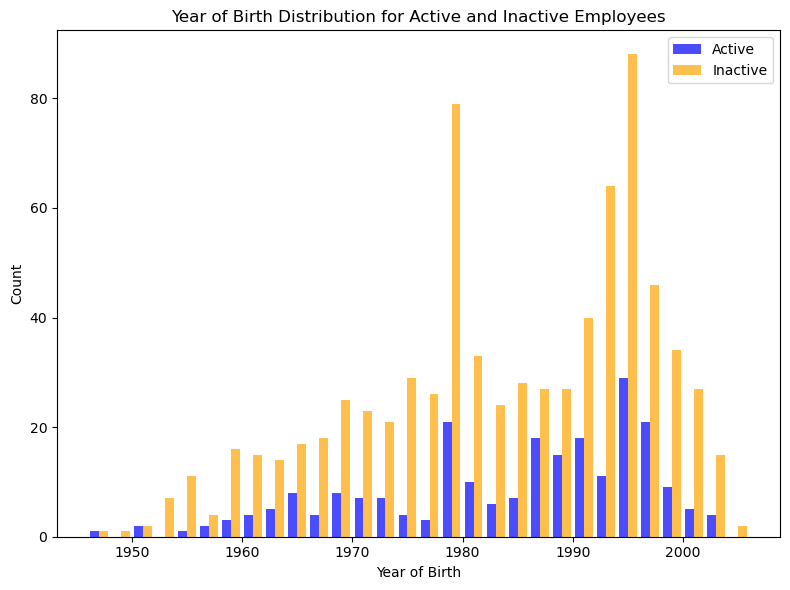

In [153]:
# Histogram for Year of Birth
plt.figure(figsize=(8, 6))
plt.hist([chatterbox_no_date_joined[chatterbox_no_date_joined['Status'] == 'Active']['Year_of_Birth'],
          chatterbox_no_date_joined[chatterbox_no_date_joined['Status'] == 'Inactive']['Year_of_Birth']],
         bins=30, alpha=0.7, color=['blue', 'orange'], label=['Active', 'Inactive'])
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.title('Year of Birth Distribution for Active and Inactive Employees')
plt.legend()
plt.tight_layout()
plt.show()



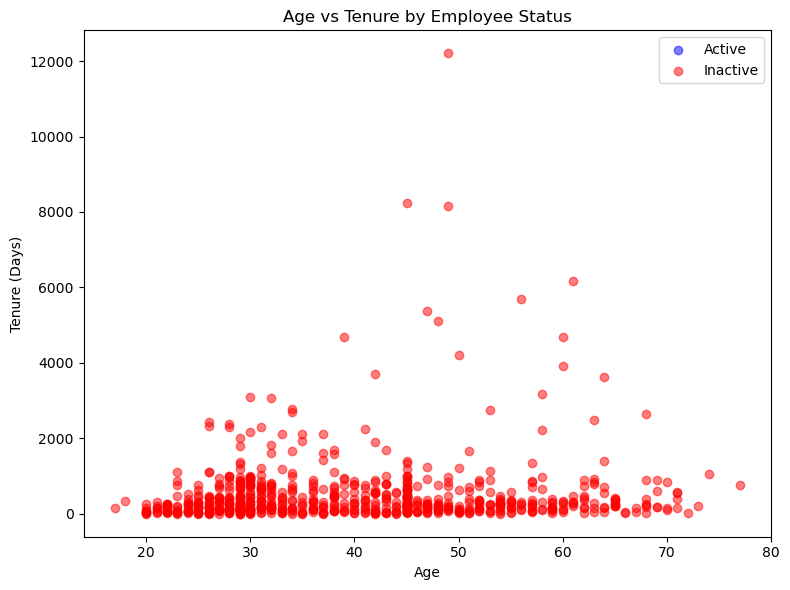

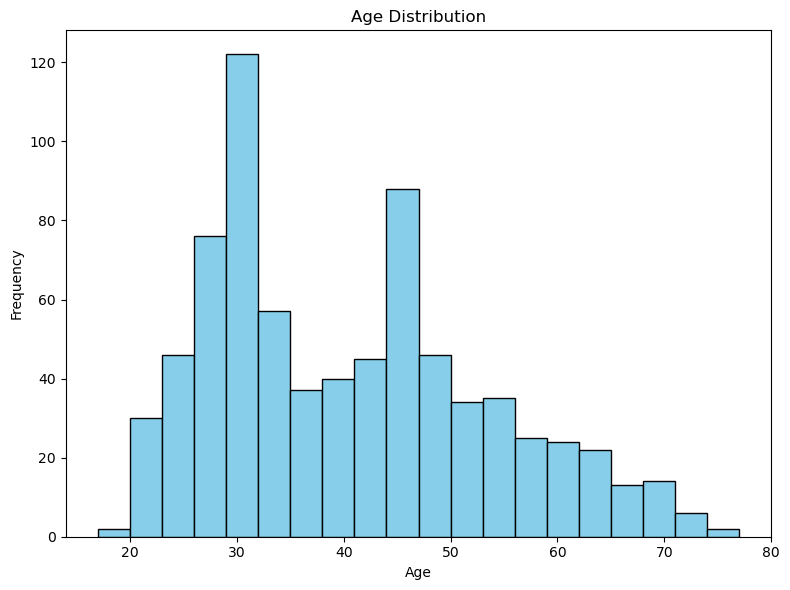

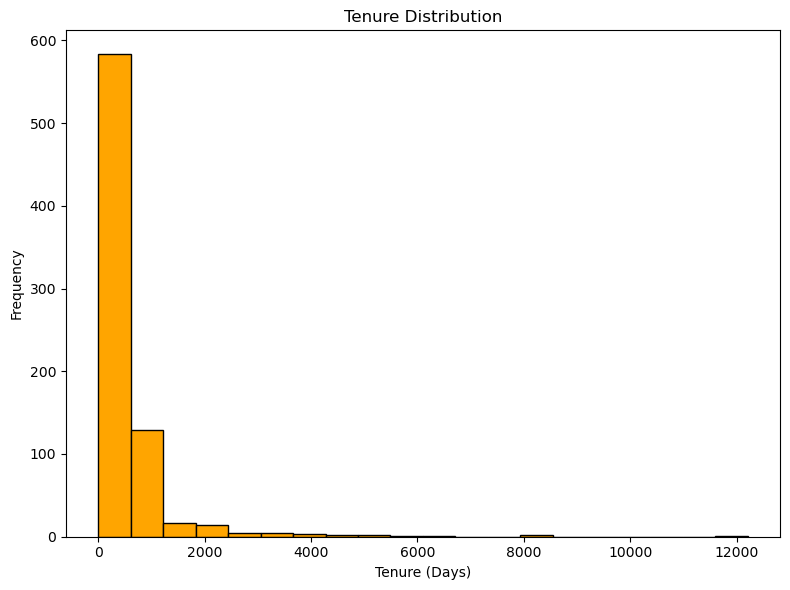

In [177]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the age of each employee based on the current year and 'Year_of_Birth'
current_year = pd.Timestamp.now().year
chatterbox['Age'] = current_year - chatterbox['Year_of_Birth']

# Convert 'Date_Joined' and 'Date_Resigned' columns to datetime format
chatterbox['Date_Joined'] = pd.to_datetime(chatterbox['Date_Joined'], errors='coerce')
chatterbox['Date_Resigned'] = pd.to_datetime(chatterbox['Date_Resigned'], errors='coerce')

# Calculate the tenure of each employee based on 'Date_Joined' and 'Date_Resigned'
chatterbox['Tenure'] = (chatterbox['Date_Resigned'] - chatterbox['Date_Joined']).dt.days

# Drop rows with negative tenure (if any) as they may indicate incorrect data
chatterbox = chatterbox[chatterbox['Tenure'] >= 0]

# Separate active and inactive employees
active_employees = chatterbox[chatterbox['Status'] == 'Active']
inactive_employees = chatterbox[chatterbox['Status'] == 'Inactive']

# Scatter Plot for Age vs Tenure with active and inactive distinction
plt.figure(figsize=(8, 6))
plt.scatter(active_employees['Age'], active_employees['Tenure'], alpha=0.5, c='blue', label='Active')
plt.scatter(inactive_employees['Age'], inactive_employees['Tenure'], alpha=0.5, c='red', label='Inactive')

plt.xlabel('Age')
plt.ylabel('Tenure (Days)')
plt.title('Age vs Tenure by Employee Status')
plt.legend()
plt.tight_layout()
plt.show()

# Histogram for Age Distribution
plt.figure(figsize=(8, 6))
plt.hist(chatterbox['Age'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

# Histogram for Tenure Distribution
plt.figure(figsize=(8, 6))
plt.hist(chatterbox['Tenure'], bins=20, edgecolor='black', color='orange')
plt.xlabel('Tenure (Days)')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')
plt.tight_layout()
plt.show()


In [178]:
import pandas as pd

# Calculate the age of each employee based on the current year and 'Year_of_Birth'
current_year = pd.Timestamp.now().year
chatterbox['Age'] = current_year - chatterbox['Year_of_Birth']

# Convert 'Date_Joined' and 'Date_Resigned' columns to datetime format
chatterbox['Date_Joined'] = pd.to_datetime(chatterbox['Date_Joined'], errors='coerce')
chatterbox['Date_Resigned'] = pd.to_datetime(chatterbox['Date_Resigned'], errors='coerce')

# Calculate the tenure of each employee based on 'Date_Joined' and 'Date_Resigned'
chatterbox['Tenure'] = (chatterbox['Date_Resigned'] - chatterbox['Date_Joined']).dt.days

# Drop rows with negative tenure (if any) as they may indicate incorrect data
chatterbox = chatterbox[chatterbox['Tenure'] >= 0]

# Compute the correlation between 'Age', 'Tenure', and 'Status' (active or inactive)
correlation_data = chatterbox[['Age', 'Tenure', 'Status']].corr()

# Get the correlation coefficient between 'Age' and 'Tenure' with 'Status' (active or inactive)
correlation_between_age_tenure_and_attrition = correlation_data.loc['Age', 'Tenure']

print(correlation_between_age_tenure_and_attrition)


0.09297821289846761


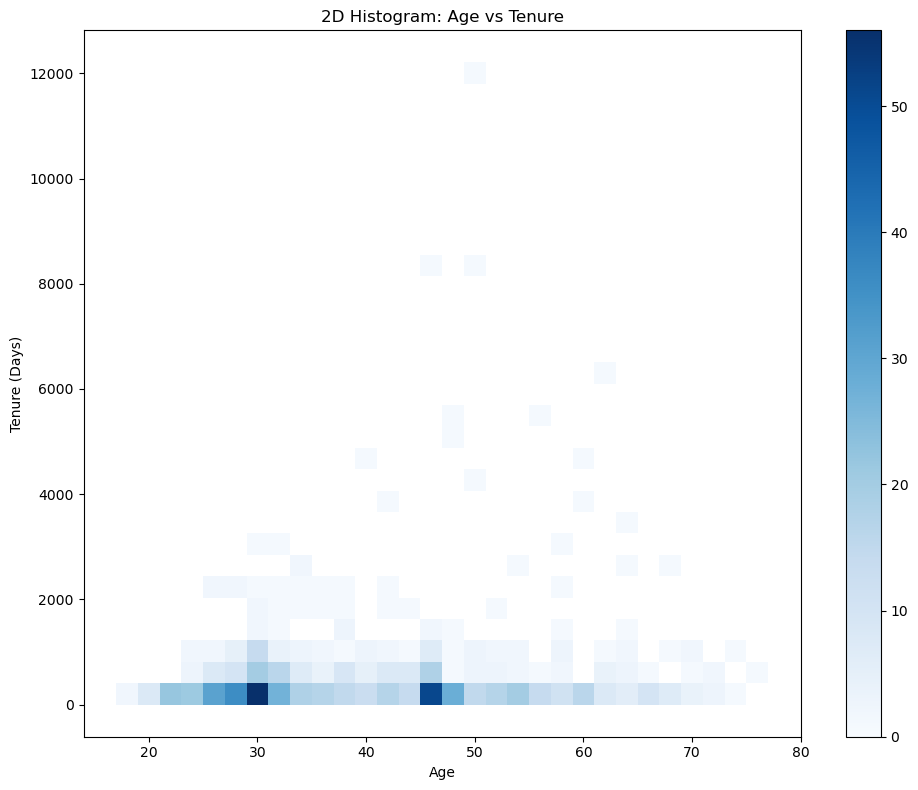

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the age of each employee based on the current year and 'Year_of_Birth'
current_year = pd.Timestamp.now().year
chatterbox['Age'] = current_year - chatterbox['Year_of_Birth']

# Convert 'Date_Joined' and 'Date_Resigned' columns to datetime format
chatterbox['Date_Joined'] = pd.to_datetime(chatterbox['Date_Joined'], errors='coerce')
chatterbox['Date_Resigned'] = pd.to_datetime(chatterbox['Date_Resigned'], errors='coerce')

# Calculate the tenure of each employee based on 'Date_Joined' and 'Date_Resigned'
chatterbox['Tenure'] = (chatterbox['Date_Resigned'] - chatterbox['Date_Joined']).dt.days

# Drop rows with negative tenure (if any) as they may indicate incorrect data
chatterbox = chatterbox[chatterbox['Tenure'] >= 0]

# Create a 2D histogram using Seaborn
plt.figure(figsize=(10, 8))
sns.histplot(data=chatterbox, x='Age', y='Tenure', bins=(30, 30), cbar=True, cmap='Blues')
plt.xlabel('Age')
plt.ylabel('Tenure (Days)')
plt.title('2D Histogram: Age vs Tenure')
plt.tight_layout()
plt.show()



<Figure size 1000x800 with 0 Axes>

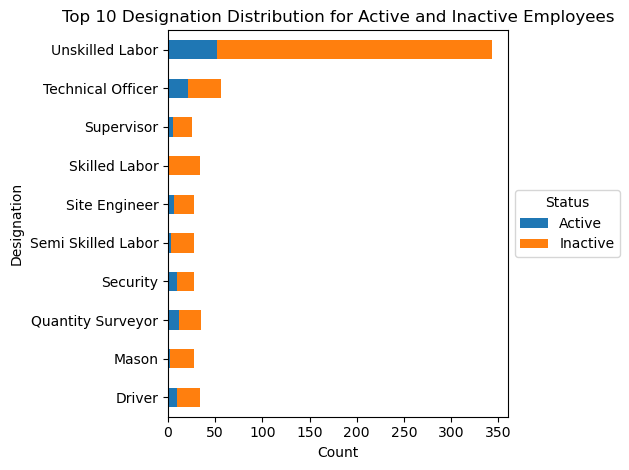

In [154]:
# Top N most frequent designations to show in the plot
top_n_designations = 10

# Get the top N most frequent designations
top_designations = chatterbox_no_date_joined['Designation'].value_counts().nlargest(top_n_designations).index

# Filter the dataframe to include only the top N designations
chatterbox_top_designations = chatterbox_no_date_joined[chatterbox_no_date_joined['Designation'].isin(top_designations)]

# Horizontal Bar Plot for Designation Distribution (Top N)
plt.figure(figsize=(10, 8))  # Adjust the figure size to accommodate the legend
ax = chatterbox_top_designations.groupby(['Designation', 'Status'])['Employee_No'].count().unstack().plot(kind='barh', stacked=True)
ax.set_xlabel('Count')
ax.set_ylabel('Designation')
ax.set_title(f'Top {top_n_designations} Designation Distribution for Active and Inactive Employees')
plt.legend(title='Status', loc='center left', bbox_to_anchor=(1, 0.5), labels=['Active', 'Inactive'])
plt.tight_layout()
plt.show()




<Figure size 1000x600 with 0 Axes>

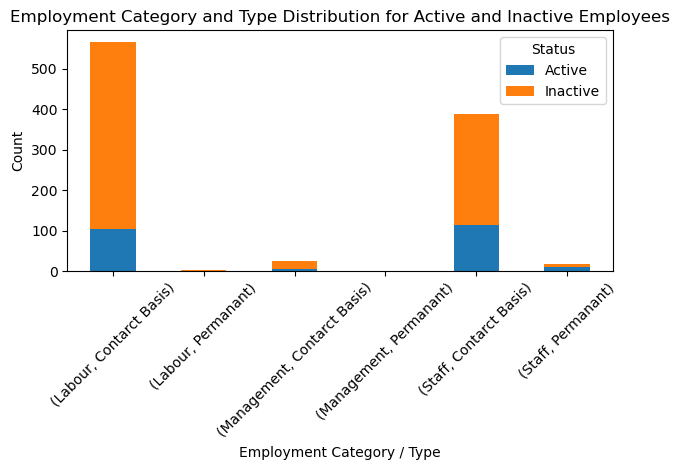

In [155]:
# Stacked Bar Plot for Employment Category and Type
plt.figure(figsize=(10, 6))
ax = chatterbox_no_date_joined.groupby(['Employment_Category', 'Employment_Type', 'Status'])['Employee_No'].count().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel('Employment Category / Type')
ax.set_ylabel('Count')
ax.set_title('Employment Category and Type Distribution for Active and Inactive Employees')
plt.legend(title='Status', loc='upper right', labels=['Active', 'Inactive'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



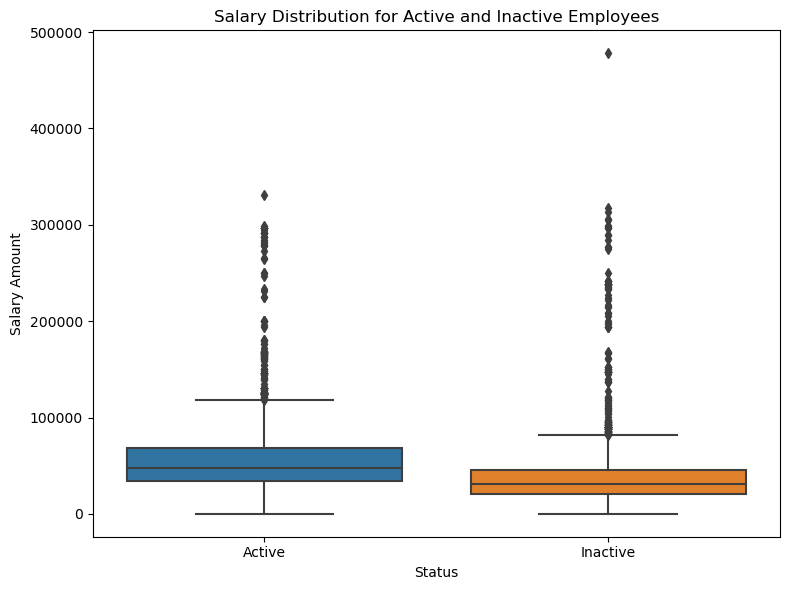

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the salary data from "salary.csv" into a DataFrame
salary_data = pd.read_csv("salary.csv")

# Select only the necessary columns from the 'salary_data' DataFrame
selected_salary_data = salary_data[['Employee_No', 'Net Salary']]

# Merge the 'selected_salary_data' DataFrame with the 'chatterbox_no_date_joined' DataFrame
chatterbox_with_salary = pd.merge(chatterbox_no_date_joined, selected_salary_data, on='Employee_No', how='left')
# Filter to remove rows with Salary equal to 0
chatterbox_with_salary = chatterbox_with_salary[chatterbox_with_salary['Net Salary'] != 0]

# Box Plot for Salary Distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Status', y='Net Salary', data=chatterbox_with_salary)
ax.set_xlabel('Status')
ax.set_ylabel('Salary Amount')
ax.set_title('Salary Distribution for Active and Inactive Employees')
plt.tight_layout()
plt.show()


In [157]:

# Check the column names in the "salary_data" DataFrame
print(salary_data.columns)

Index(['Employee_No', 'year', 'month', 'SiteNo', 'Area',
       'Accomadation Allowance', 'Accommodation Allowance',
       'Add. Allow. No Pay Deduction', 'Additional Allowance_0',
       'Additional Allowance_2',
       ...
       'WSL No of Full Worked Days', 'WSL No of Half Days', 'WSL OT 1.5',
       'WSL OT Hours 1.5', 'WSL OT Rate', 'WSL Total Earning',
       'WSL Total Working Days', 'WSLOther Allowance Rate',
       'Working Days - Full', 'Working Days - Half Day'],
      dtype='object', length=109)


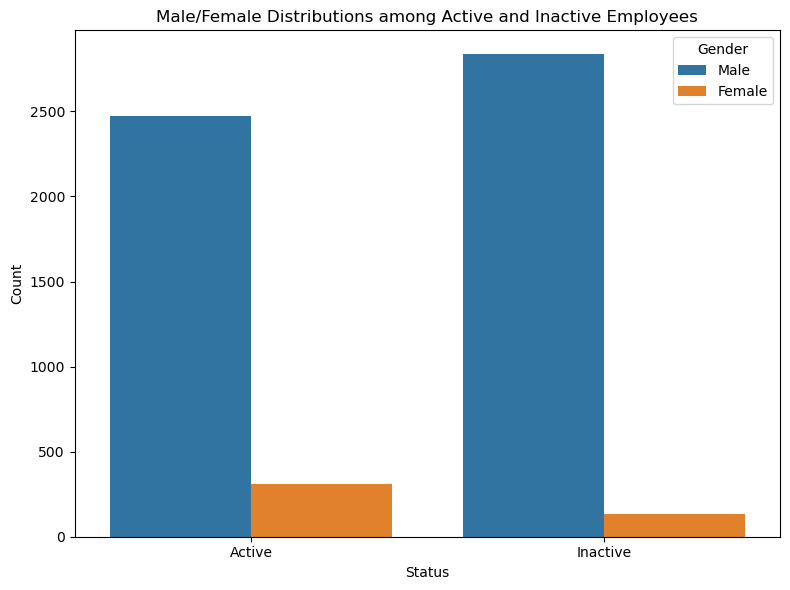

In [158]:
# Bar Plot for Male/Female Distributions among Active and Inactive Employees
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Status', hue='Gender', data=chatterbox_with_salary)
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_title('Male/Female Distributions among Active and Inactive Employees')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()

In [161]:
import pandas as pd


# Group the data by 'Gender' and 'Status' and count the number of employees in each group
gender_status_counts = chatterbox_with_salary.groupby(['Gender', 'Status']).size().unstack()

# Get the count of active and inactive employees for each gender
active_male_count = gender_status_counts.loc['Male', 'Active']
inactive_male_count = gender_status_counts.loc['Male', 'Inactive']
active_female_count = gender_status_counts.loc['Female', 'Active']
inactive_female_count = gender_status_counts.loc['Female', 'Inactive']

# Display the results
print("Active Male Employees:", active_male_count)
print("Inactive Male Employees:", inactive_male_count)
print("Active Female Employees:", active_female_count)
print("Inactive Female Employees:", inactive_female_count)


# Calculate the total number of male and female employees at the beginning of the period
total_male_beginning = active_male_count + inactive_male_count
total_female_beginning = active_female_count + inactive_female_count

# Calculate the retention rates for male and female employees
retention_rate_male = (active_male_count / total_male_beginning) * 100
retention_rate_female = (active_female_count / total_female_beginning) * 100

# Display the retention rates
print("Retention Rate for Male Employees: {:.2f}%".format(retention_rate_male))
print("Retention Rate for Female Employees: {:.2f}%".format(retention_rate_female))


Active Male Employees: 2475
Inactive Male Employees: 2835
Active Female Employees: 307
Inactive Female Employees: 133
Retention Rate for Male Employees: 46.61%
Retention Rate for Female Employees: 69.77%


In [162]:
# Convert 'Status' column to numeric format for correlation calculation
chatterbox_with_salary['Status'] = chatterbox_with_salary['Status'].map({'Active': 1, 'Inactive': 0})

# Select only numerical columns for correlation calculation
numerical_columns = chatterbox_with_salary.select_dtypes(include='number')

# Calculate the correlation matrix between 'Status' and other numerical features
correlation_matrix = numerical_columns.corr()

print(correlation_matrix)

                Employee_No  Employee_Code  Religion_ID  Designation_ID  \
Employee_No        1.000000       0.399779    -0.183415        0.151241   
Employee_Code      0.399779       1.000000    -0.090600        0.049544   
Religion_ID       -0.183415      -0.090600     1.000000       -0.074286   
Designation_ID     0.151241       0.049544    -0.074286        1.000000   
Status            -0.176610      -0.341665     0.023097        0.076837   
Year_of_Birth      0.078955      -0.150266     0.071567        0.039515   
Net Salary        -0.092380      -0.211042     0.123899        0.009224   

                  Status  Year_of_Birth  Net Salary  
Employee_No    -0.176610       0.078955   -0.092380  
Employee_Code  -0.341665      -0.150266   -0.211042  
Religion_ID     0.023097       0.071567    0.123899  
Designation_ID  0.076837       0.039515    0.009224  
Status          1.000000       0.032089    0.232361  
Year_of_Birth   0.032089       1.000000    0.005403  
Net Salary      0.232

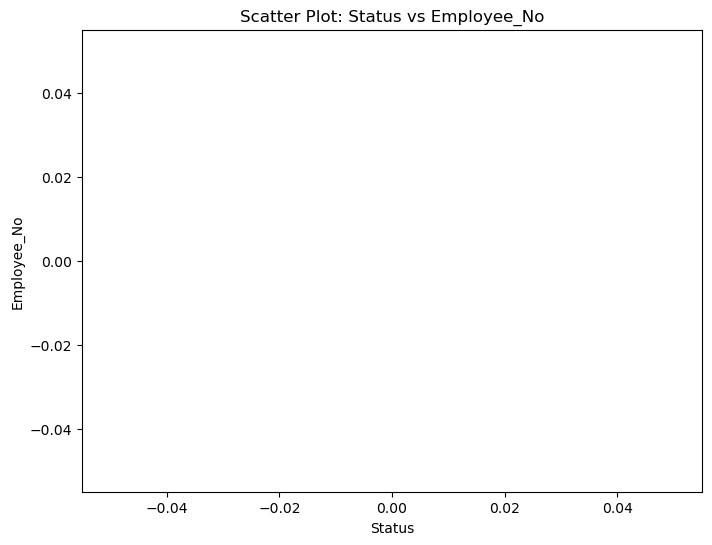

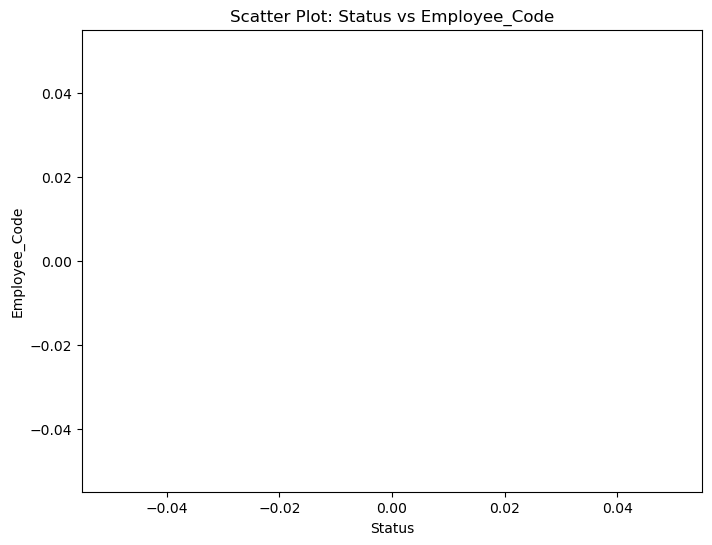

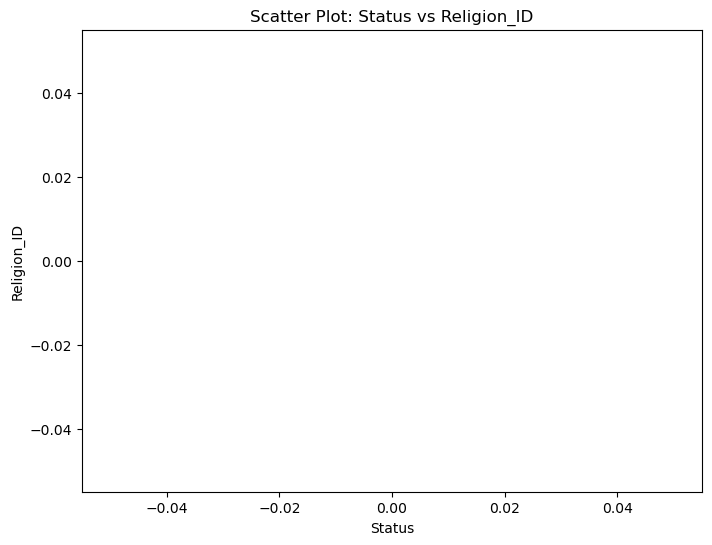

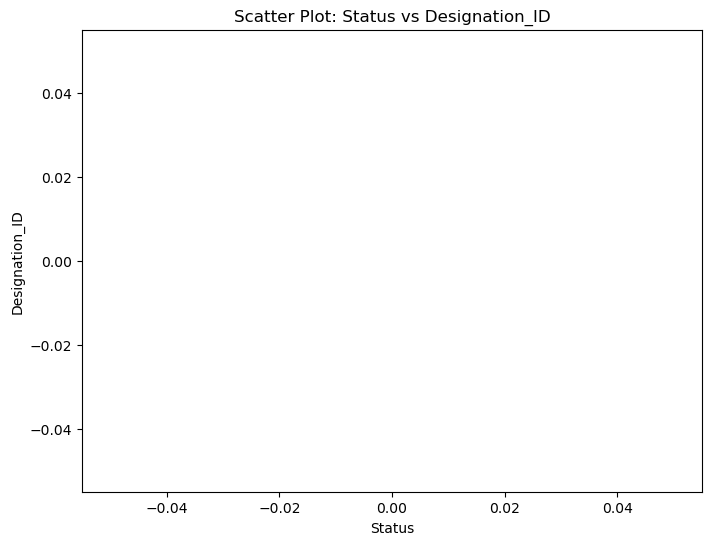

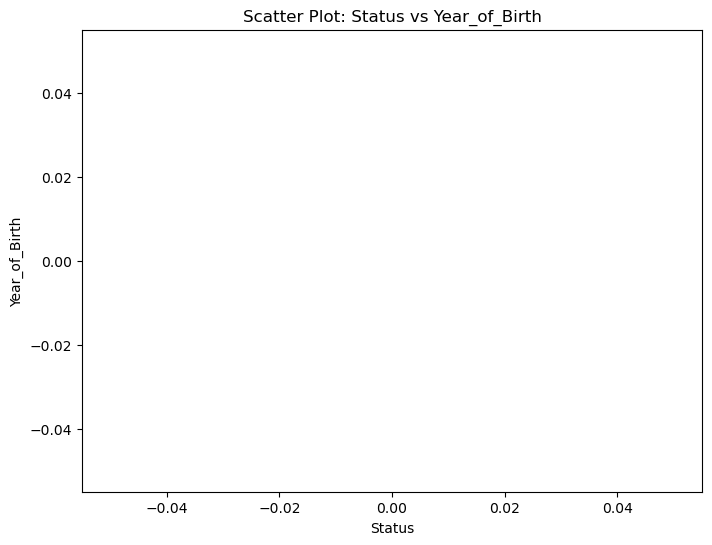

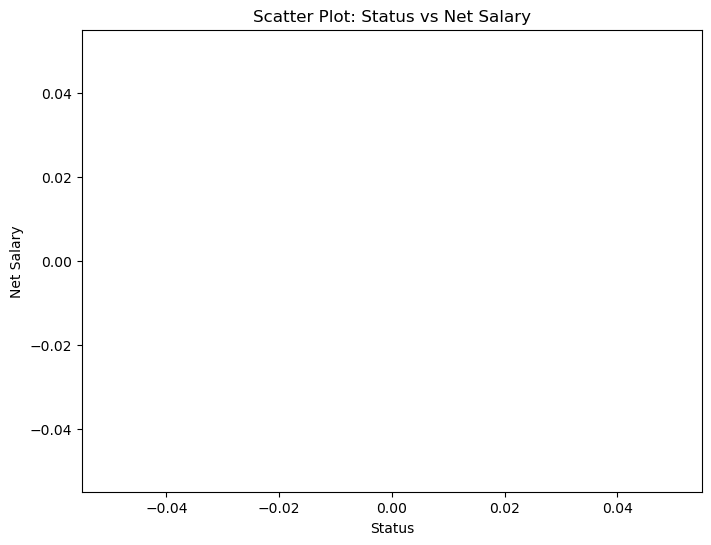

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Status' column to numeric format for correlation calculation
chatterbox_with_salary['Status'] = chatterbox_with_salary['Status'].map({'Active': 1, 'Inactive': 0})

# Get all numerical columns except 'Status'
numeric_columns = chatterbox_with_salary.select_dtypes(include='number').drop(columns='Status')

# Create scatter plots for every numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Status', y=col, data=chatterbox_with_salary)
    plt.xlabel('Status')
    plt.ylabel(col)
    plt.title(f'Scatter Plot: Status vs {col}')
    plt.show()

In [164]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Convert 'Status' column to numeric format for correlation calculation
chatterbox_with_salary['Status'] = chatterbox_with_salary['Status'].map({'Active': 1, 'Inactive': 0})

# Select all numerical columns for correlation calculation
numerical_columns = chatterbox_with_salary.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical columns using Pearson correlation
correlation_numerical = numerical_columns.corr()

# Select all categorical columns for correlation calculation
categorical_columns = chatterbox_with_salary.select_dtypes(exclude=np.number)

# Calculate the correlation matrix for categorical columns using Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

correlation_categorical = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

for i in range(len(categorical_columns.columns)):
    for j in range(len(categorical_columns.columns)):
        if i == j:
            correlation_categorical.iloc[i, j] = 1.0
        else:
            correlation_categorical.iloc[i, j] = cramers_v(categorical_columns.iloc[:, i], categorical_columns.iloc[:, j])

# Display correlation matrices for both numerical and categorical data
print("Correlation for Numerical Data:")
print(correlation_numerical)
print("\nCorrelation for Categorical Data:")
print(correlation_categorical)


C:\Users\Sanu\AppData\Local\Temp\ipykernel_37896\3526239157.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))
C:\Users\Sanu\AppData\Local\Temp\ipykernel_37896\3526239157.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))
C:\Users\Sanu\AppData\Local\Temp\ipykernel_37896\3526239157.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))
C:\Users\Sanu\AppData\Local\Temp\ipykernel_37896\3526239157.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))
C:\Users\Sanu\AppData\Local\Temp\ipykernel_37896\3526239157.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))
C:\Users\Sanu\AppData\Local\Temp\ipykernel_37896\3526239157.py:27: RuntimeWarnin

Correlation for Numerical Data:
                Employee_No  Employee_Code  Religion_ID  Designation_ID  \
Employee_No        1.000000       0.399779    -0.183415        0.151241   
Employee_Code      0.399779       1.000000    -0.090600        0.049544   
Religion_ID       -0.183415      -0.090600     1.000000       -0.074286   
Designation_ID     0.151241       0.049544    -0.074286        1.000000   
Status                  NaN            NaN          NaN             NaN   
Year_of_Birth      0.078955      -0.150266     0.071567        0.039515   
Net Salary        -0.092380      -0.211042     0.123899        0.009224   

                Status  Year_of_Birth  Net Salary  
Employee_No        NaN       0.078955   -0.092380  
Employee_Code      NaN      -0.150266   -0.211042  
Religion_ID        NaN       0.071567    0.123899  
Designation_ID     NaN       0.039515    0.009224  
Status             NaN            NaN         NaN  
Year_of_Birth      NaN       1.000000    0.005403  
Net

C:\Users\Sanu\AppData\Local\Temp\ipykernel_37896\3526239157.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))


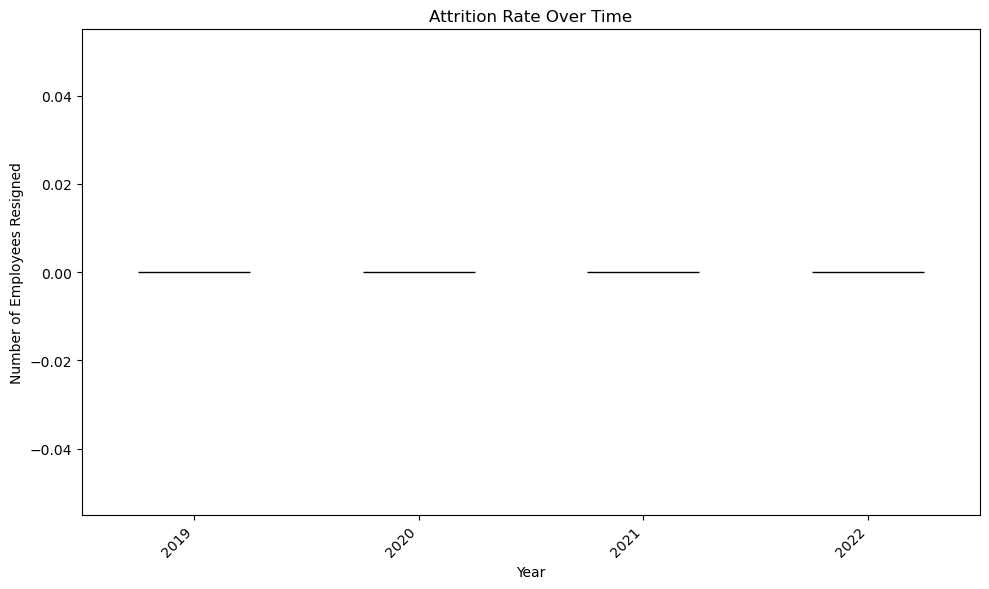

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the 'selected_salary_data' DataFrame with the 'chatterbox_no_date_joined' DataFrame
chatterbox_with_salary = pd.merge(chatterbox, selected_salary_data, on='Employee_No', how='left')
# Filter to remove rows with Salary equal to 0
chatterbox_with_salary = chatterbox_with_salary[chatterbox_with_salary['Net Salary'] != 0]


# Convert 'Status' column to numeric format (1 for 'Active' and 0 for 'Inactive')
chatterbox_with_salary['Status'] = chatterbox_with_salary['Status'].map({'Active': 1, 'Inactive': 0})

# Convert 'Date_Resigned' column to datetime format
chatterbox_with_salary['Date_Resigned'] = pd.to_datetime(chatterbox_with_salary['Date_Resigned'], errors='coerce')

# Drop rows with '\N' or missing values in the 'Date_Resigned' column
chatterbox_with_salary = chatterbox_with_salary.dropna(subset=['Date_Resigned'])

# Extract the year from the 'Date_Resigned' column
chatterbox_with_salary['Year_Resigned'] = pd.to_datetime(chatterbox_with_salary['Date_Resigned']).dt.year

# Group by year and count the number of employees who resigned in each year
attrition_by_year = chatterbox_with_salary.groupby('Year_Resigned')['Status'].sum()

# Create a bar plot for attrition rate over time
plt.figure(figsize=(10, 6))
attrition_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Employees Resigned')
plt.title('Attrition Rate Over Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

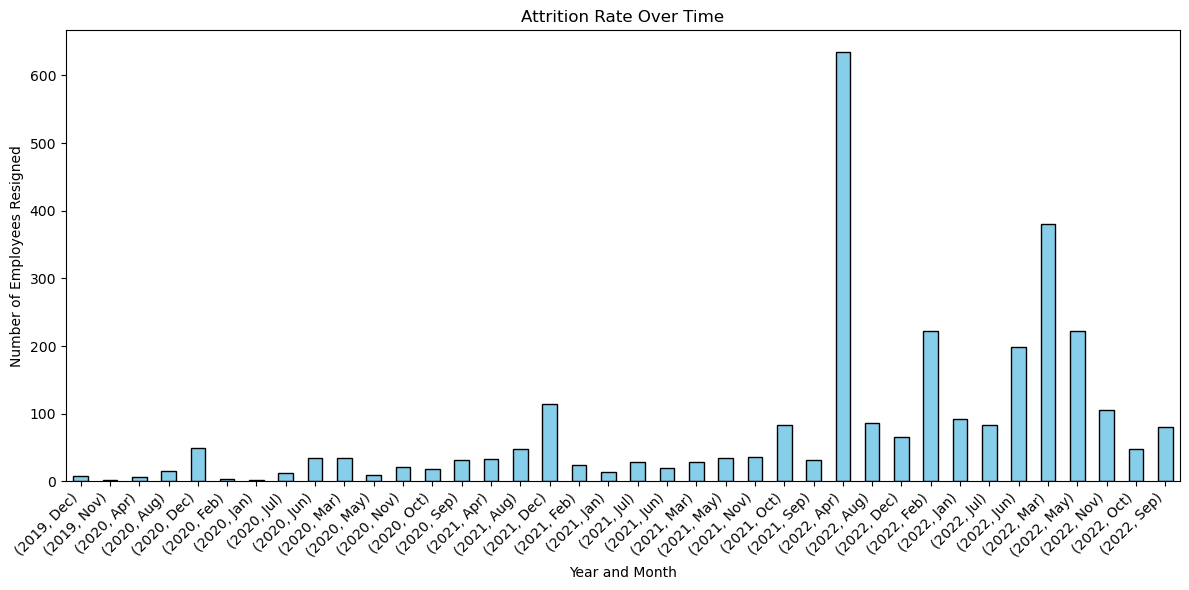

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed dataset with salary information
df = pd.read_csv("employee_preprocess_200583P.csv")

# Load the salary data from "salary.csv" into a DataFrame
salary_data = pd.read_csv("salary.csv")

# Select only the necessary columns from the 'salary_data' DataFrame
selected_salary_data = salary_data[['Employee_No', 'Net Salary']]

# Merge the 'selected_salary_data' DataFrame with the 'chatterbox_no_date_joined' DataFrame
chatterbox_with_salary = pd.merge(df, selected_salary_data, on='Employee_No', how='left')
# Filter to remove rows with Salary equal to 0
chatterbox_with_salary = chatterbox_with_salary[chatterbox_with_salary['Net Salary'] != 0]

# Convert 'Status' column to numeric format (1 for 'Active' and 0 for 'Inactive')
chatterbox_with_salary['Status'] = chatterbox_with_salary['Status'].map({'Active': 1, 'Inactive': 0})

# Convert 'Date_Resigned' column to datetime format
chatterbox_with_salary['Date_Resigned'] = pd.to_datetime(chatterbox_with_salary['Date_Resigned'], errors='coerce')

# Drop rows with '\N' or missing values in the 'Date_Resigned' column
chatterbox_with_salary = chatterbox_with_salary.dropna(subset=['Date_Resigned'])
#print(chatterbox_with_salary)

# Check if there is any data left after filtering
if chatterbox_with_salary.empty:
    print("No data available for attrition analysis.")
else:
    # Extract the year and month from the 'Date_Resigned' column
    chatterbox_with_salary['Year_Resigned'] = chatterbox_with_salary['Date_Resigned'].dt.year
    chatterbox_with_salary['Month_Resigned'] = chatterbox_with_salary['Date_Resigned'].dt.strftime('%b')
#     print(chatterbox_with_salary['Year_Resigned'])

    # Group by year and month and count the number of employees who resigned in each month
    attrition_by_month = chatterbox_with_salary.groupby(['Year_Resigned','Month_Resigned'])['Status'].size()
    
#     print(attrition_by_month)

    # Create a bar plot for attrition rate over time with year and month on the x-axis
    plt.figure(figsize=(12, 6))
    attrition_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Year and Month')
    plt.ylabel('Number of Employees Resigned')
    plt.title('Attrition Rate Over Time')
    plt.xticks(rotation=45, ha='right')


    
    plt.tight_layout()
    plt.show()


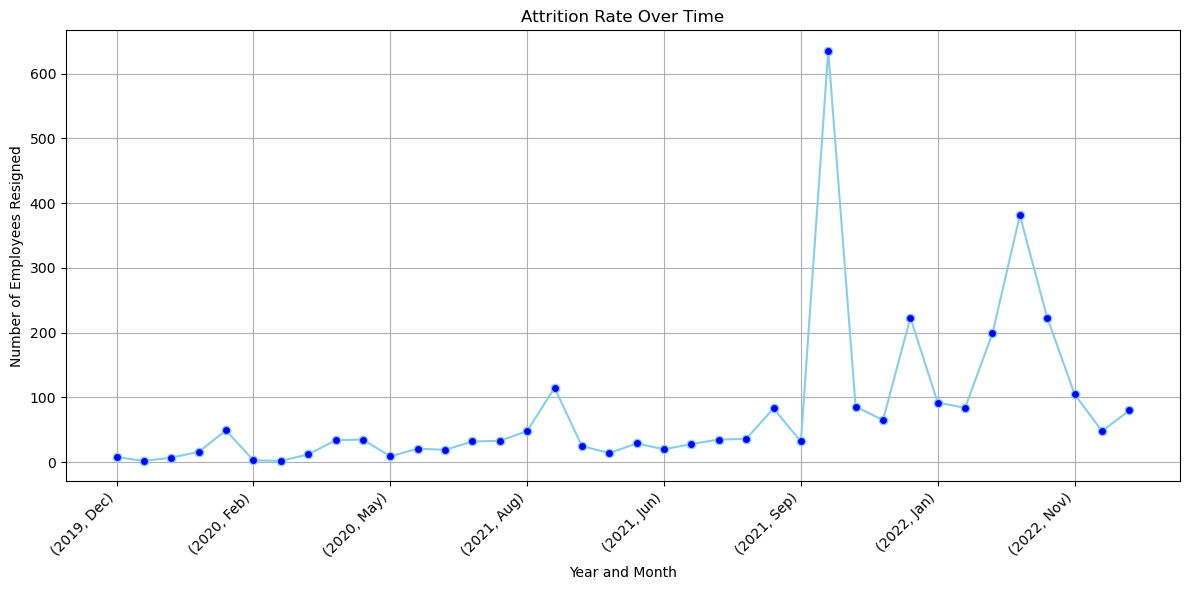

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed dataset with salary information
df = pd.read_csv("employee_preprocess_200583P.csv")

# Load the salary data from "salary.csv" into a DataFrame
salary_data = pd.read_csv("salary.csv")

# Select only the necessary columns from the 'salary_data' DataFrame
selected_salary_data = salary_data[['Employee_No', 'Net Salary']]

# Merge the 'selected_salary_data' DataFrame with the 'chatterbox_no_date_joined' DataFrame
chatterbox_with_salary = pd.merge(df, selected_salary_data, on='Employee_No', how='left')
# Filter to remove rows with Salary equal to 0
chatterbox_with_salary = chatterbox_with_salary[chatterbox_with_salary['Net Salary'] != 0]

# Convert 'Status' column to numeric format (1 for 'Active' and 0 for 'Inactive')
chatterbox_with_salary['Status'] = chatterbox_with_salary['Status'].map({'Active': 1, 'Inactive': 0})

# Convert 'Date_Resigned' column to datetime format
chatterbox_with_salary['Date_Resigned'] = pd.to_datetime(chatterbox_with_salary['Date_Resigned'], errors='coerce')

# Drop rows with '\N' or missing values in the 'Date_Resigned' column
chatterbox_with_salary = chatterbox_with_salary.dropna(subset=['Date_Resigned'])
#print(chatterbox_with_salary)

# Check if there is any data left after filtering
if chatterbox_with_salary.empty:
    print("No data available for attrition analysis.")
else:
    # Extract the year and month from the 'Date_Resigned' column
    chatterbox_with_salary['Year_Resigned'] = chatterbox_with_salary['Date_Resigned'].dt.year
    chatterbox_with_salary['Month_Resigned'] = chatterbox_with_salary['Date_Resigned'].dt.strftime('%b')
#     print(chatterbox_with_salary['Year_Resigned'])

    # Group by year and month and count the number of employees who resigned in each month
    attrition_by_month = chatterbox_with_salary.groupby(['Year_Resigned','Month_Resigned'])['Status'].size()
    
#     print(attrition_by_month)

    # Sort the data by year and month
    attrition_by_month = attrition_by_month.sort_index(level=['Year_Resigned', 'Month_Resigned'])

    # Create a line plot for attrition rate over time with year and month on the x-axis
    plt.figure(figsize=(12, 6))
    attrition_by_month.plot(kind='line', color='skyblue', marker='o', markerfacecolor='blue', markeredgewidth=1, markersize=6)
    plt.xlabel('Year and Month')
    plt.ylabel('Number of Employees Resigned')
    plt.title('Attrition Rate Over Time')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(True)  # Add grid lines
    plt.show()


In [170]:
# Access the bar height values (number of employees who resigned)
bar_height = attrition_by_month.values
# Access the bar height values (number of employees who resigned) as a list
bar_height = attrition_by_month.values.tolist()
print(bar_height)

[8, 2, 7, 16, 49, 3, 2, 12, 34, 35, 9, 21, 19, 32, 33, 48, 115, 25, 14, 29, 20, 28, 35, 36, 83, 32, 635, 86, 65, 223, 92, 84, 199, 381, 223, 105, 48, 80]


In [168]:
# Load the attendance file into a DataFrame
attendance_df = pd.read_csv("attendance.csv")

attendance_df['Hourly_Time'] = attendance_df['Hourly_Time'][attendance_df['Hourly_Time'] != '\\N']

# Convert the 'Hourly_Time' column from string to float
attendance_df['Hourly_Time'] = attendance_df['Hourly_Time'].astype(float)

# Group by employee_no and calculate the sum of hourly rates for each employee
total_hourly_time_per_employee = attendance_df.groupby('Employee_No')['Hourly_Time'].sum()
# print(total_hourly_time_per_employee)

# Merge the 'total_hourly_time_per_employee' Series with the 'employee_preprocess_df' DataFrame
merged_df = pd.merge(chatterbox_with_salary, total_hourly_time_per_employee, left_on='Employee_No', right_index=True, how='left')

# Rename the merged column to 'Total_Hourly_Time'
merged_df.rename(columns={'Hourly_Time': 'Total_Hourly_Time'}, inplace=True)

C:\Users\Sanu\AppData\Local\Temp\ipykernel_37896\2025324061.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  attendance_df = pd.read_csv("attendance.csv")


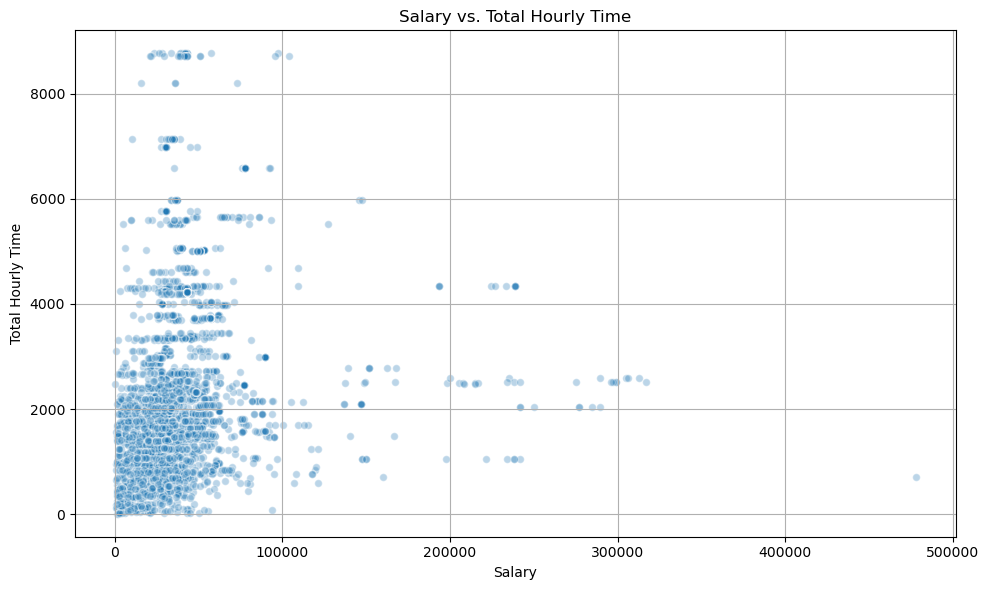

Correlation between Salary and Hourly Time: 0.17760695704004933


In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship between salary and total hourly time
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Net Salary'], merged_df['Total_Hourly_Time'], alpha=0.3, s=30, edgecolors='w')
plt.xlabel('Salary')
plt.ylabel('Total Hourly Time')
plt.title('Salary vs. Total Hourly Time')
plt.grid(True)

# Set the range for the x-axis and y-axis
# plt.xlim(0, 100000)
# plt.ylim(0, 100000)

plt.tight_layout()
plt.show()

# Calculate the correlation between 'Net Salary' and 'Total_Hourly_Time'
correlation = merged_df['Net Salary'].corr(merged_df['Total_Hourly_Time'])

# Display the correlation coefficient
print("Correlation between Salary and Hourly Time:", correlation)

<Figure size 800x600 with 0 Axes>

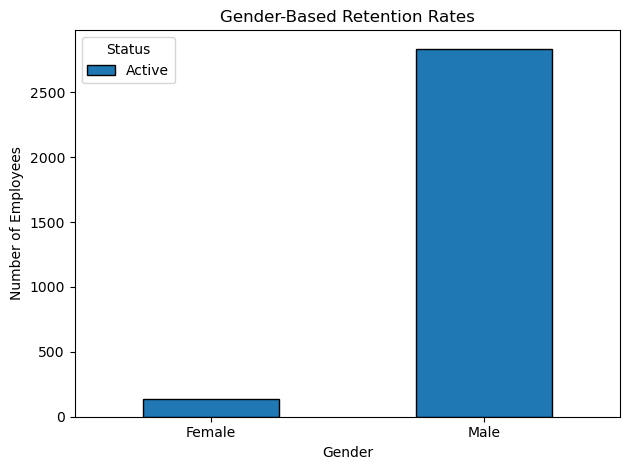

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Gender' and 'Status' and count the number of employees in each group
gender_status_counts = merged_df.groupby(['Gender', 'Status']).size().unstack()

# Create a bar plot to visualize the retention rates based on gender
plt.figure(figsize=(8, 6))
gender_status_counts.plot(kind='bar', stacked=True, edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.title('Gender-Based Retention Rates')
plt.legend(title='Status', labels=['Active', 'Inactive'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
